# Lab: Feature Selection for Linear Models for Baseball Salaries

Ever wondered why sports players make the money they do?

In this lab, we will use linear models with feature selection to figure this out. The problem is to predict a baseball player's salary based on various statistics such as the number of hits, home runs, etc.  In doing the lab, you will learn how to:

* Convert categorical features to numerical values using tools in the `pandas` package.
* Perform LASSO and compare the results with simple linear mddel fit without regularization.
* Visualize the features obtained by LASSO and the LASSO path.

This lab is a Python adaptation of p. 251-255 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. 

Submission: 

* Fill in all the parts labeled `TODO`
* Print out your jupyter notebook, convert to pdf and upload on CCLE.

## Loading and Pre-processing the Data

First we load some standard packages. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # so that all lines will be printed

First, download the file `Hitters.csv` from the assignment page on the CCLE website.  Use the `pd.read_csv` command to load the file into a dataframe `df`.  Then, use the `pd.head()` command to view the first few lines of the file.  It is always good to visualize the  dataframe to ensure that the file is loaded correctly.

In [3]:
# TODO
df = pd.read_csv("Hitters.csv")
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


Now do the following
* Use the `df = df.dropna()` command to remove any rows of the dataframe where there is incomplete data
* Use the the `df = df.drop(col_list,s=1)` method to remove the column with the player's name.  For the parameter `col_list`, put the list of string names of the columns to be dropped.
* Use `df.info()` to show all the columns.

In [4]:
# TODO
df = df.dropna()
df = df.drop(["Unnamed: 0"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


You should see that three of the columns have `object` types.  These are categorical variables.  For example, `Division` is `E` or `W` for East or West.  We need to convert these to numeric values using one-hot coding.  Pandas has a routine for this called `get_dummies`.  Run `get_dummies` on the dataframe and run the `info` command to print the new columns.

In [5]:
# TODO
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 23 columns):
AtBat          263 non-null int64
Hits           263 non-null int64
HmRun          263 non-null int64
Runs           263 non-null int64
RBI            263 non-null int64
Walks          263 non-null int64
Years          263 non-null int64
CAtBat         263 non-null int64
CHits          263 non-null int64
CHmRun         263 non-null int64
CRuns          263 non-null int64
CRBI           263 non-null int64
CWalks         263 non-null int64
PutOuts        263 non-null int64
Assists        263 non-null int64
Errors         263 non-null int64
Salary         263 non-null float64
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(1), int64(16), uint8(6)
memory usage: 38.5 KB


You can see that the field such as `Division` has been converted to two fields `Division_E` and `Division_W`.  For one-hot coding we can remove one of each of the new fields.  Use the `df.drop(...)` method to do this.

In [6]:
# TODO
df = df.drop(["League_A", "Division_E", "NewLeague_A"], axis=1)  # Put the list of columns to drop in the arguments

Extract the `salary` column from the `df` dataframe and convert it to a `numpy` array `y`.  This will be the target vector.

In [7]:
# TODO
y = df["Salary"].values
y # look at Salary array

array([  475.   ,   480.   ,   500.   ,    91.5  ,   750.   ,    70.   ,
         100.   ,    75.   ,  1100.   ,   517.143,   512.5  ,   550.   ,
         700.   ,   240.   ,   775.   ,   175.   ,   135.   ,   100.   ,
         115.   ,   600.   ,   776.667,   765.   ,   708.333,   750.   ,
         625.   ,   900.   ,   110.   ,   612.5  ,   300.   ,   850.   ,
          90.   ,    67.5  ,   180.   ,   305.   ,   215.   ,   247.5  ,
         815.   ,   875.   ,    70.   ,  1200.   ,   675.   ,   415.   ,
         340.   ,   416.667,  1350.   ,    90.   ,   275.   ,   230.   ,
         225.   ,   950.   ,    75.   ,   105.   ,   320.   ,   850.   ,
         535.   ,   933.333,   850.   ,   210.   ,   325.   ,   275.   ,
         450.   ,  1975.   ,  1900.   ,   600.   ,  1041.667,   110.   ,
         260.   ,   475.   ,   431.5  ,  1220.   ,    70.   ,   145.   ,
         595.   ,  1861.46 ,   300.   ,   490.   ,  2460.   ,   375.   ,
         750.   ,  1175.   ,    70.   ,  1500.   , 

For the features, first create a dataframe `dfX` with the `salary` column removed.  You can use the `df.drop(...)` method.  Then, get a list of the feature names `features` from `dfX.columns.tolist()`.  We will use this list for printing later. Then, convert the dataframe `dfX` to a numpy array `X` for the data matrix of all the othe features.

In [8]:
# TODO
dfX = df.drop(["Salary"], axis = 1)
features = dfX.columns.tolist()
X = dfX.values

Print the number of samples, number of features, average salary and std deviation of the salary.  Note the salary is 1000s of US dollars.

In [9]:
# TODO
y.shape # 263 samples in salary

(263,)

In [10]:
X.shape # 263 observations and 19 features to predict salary

(263, 19)

In [11]:
y.mean() # Salary mean is $535,926!

535.92588212927751

In [12]:
y.std() # standard deviation of salary is $450,260

450.26022382434286

Finally, before continuing, we want to scale the features `X` and target `y` so that they have mean 0 and unit variance.  To do this, use the `preprocessing.scale` method.  Let `Xs` and `ys` be the scaled feature matrix.

In [13]:
from sklearn import preprocessing

# TODO 
X = X.astype(float)   # Needed to avoid a warning with the scale method
Xs = preprocessing.scale(dfX)
ys = preprocessing.scale(y)

# confirming that mean is 0 and unit variance
Xs.mean()

2.6305864741968887e-17

In [14]:
ys.mean()

1.5196969158367161e-16

In [15]:
Xs.std()

1.0

In [16]:
ys.std()

1.0

# Linear Models with No Regularization

First, we will try to fit the data with a linear model with no regularization.  First, split the data into training and test using half the samples for each.  You can use the `train_test_split` method. 

In [17]:
from sklearn.model_selection import train_test_split

#TODO
X_tr, X_ts, y_tr, y_ts = train_test_split(Xs, ys, test_size = 0.5, random_state = 2018)

Now use the `linear_model.LinearRegression()` to fit a linear model on the training data.  Measure the normalized MSE on the training and test data.  By normalized MSE we mean:

    mse = np.mean((y-yhat)**2)/np.mean(y**2)
  
where `y` is the mean-removed true value and `yhat` is the predicted value.  This is the percentage of variance not explained by the model.   

In [18]:
from sklearn import linear_model

# TODO:  Fit linear model 
lm = linear_model.LinearRegression()
lm.fit(X_tr, y_tr)
pred_train = lm.predict(X_tr)
pred_test = lm.predict(X_ts)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# TODO:  Measure normalized mse for the training set and print
mse_train = np.mean((y_tr - pred_train)**2)/np.mean(y_tr**2)
mse_train # normalized training MSE is 0.3655

0.3655443684965497

In [20]:
# TODO:  Measure normalized mse for the test set and print
mse_test = np.mean((y_ts - pred_test)**2)/np.mean(y_ts**2)
mse_test # normalized training MSE on test set is 0.6311

0.63110728872131772

## LASSO

If you did the above correctly, you should see that the test MSE is a lot higher than the training MSE.  This suggests over-fitting. To avoid this, we will use LASSO in combination with k-fold cross validation.  The `sklearn` package has many methods for this purpose. In particular, there is a method `LassoCV()` that performs cross-validation and LASSO fitting.  But, here we will do the cross-validation and regularization selection manually so that you can see how it is done. 

Toward this end, we first construct a K-fold object with the `model_selection.KFold(...)` command.  Set the parameter `n_splits=nfold` with `nfold = 10`.  Also, set `shuffle=True` to make sure the data is shuffled.

In [21]:
from sklearn import model_selection
nfold = 10

# TODO
kf = model_selection.KFold(n_splits = nfold, shuffle = True)

Set the `alpha` values to test in some range.  In this case, it is useful to logarithically space `alpha` from 1e-4 to 1e3.

In [22]:
# TODO:  Create alpha values to test 
nalpha = 100
alpha_test = np.logspace(0.0001, 1000, num = nalpha)  # Use np.logspace(...)
alpha_test

C:\Users\KK\Anaconda3\lib\site-packages\numpy\core\function_base.py:226: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


array([  1.00023029e+000,   1.26214453e+010,   1.59264206e+020,
         2.00968168e+030,   2.53592476e+040,   3.19996667e+050,
         4.03789057e+060,   5.09522816e+070,   6.42943377e+080,
         8.11300639e+090,   1.02374291e+101,   1.29181404e+111,
         1.63008065e+121,   2.05692370e+131,   2.59553729e+141,
         3.27518898e+151,   4.13281014e+161,   5.21500279e+171,
         6.58057187e+181,   8.30372059e+191,   1.04780826e+202,
         1.32218099e+212,   1.66839930e+222,   2.10527625e+232,
         2.65655115e+242,   3.35217955e+252,   4.22996100e+262,
         5.33759299e+272,   6.73526279e+282,   8.49891795e+292,
         1.07243932e+303,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               

Now, we do the main cross-validation loop.   You can do this by completing the following code.

In [23]:
# Construct the LASSO estimator
model = linear_model.Lasso(alpha=1e-3)

# Create an array to store the MSE values
mse_ts = np.zeros((nalpha,nfold))

# main cross-validation loop
for isplit, (train_ind, test_ind) in enumerate(kf.split(Xs)):
    print("fold = %d " % isplit)

    # TODO:  Get the training data in the split
    Xtr = Xs[train_ind]
    Xts = Xs[test_ind]
    ytr = ys[train_ind]
    yts = ys[test_ind]

    # Loop over the alpha values    
    for it, a in enumerate(alpha_test):

        # TODO:  Set the model `alpha` value
        model.alpha = a

        # TODO:  Fit the data on the training data 
        lasso = linear_model.Lasso()
        lasso.set_params(alpha = a)
        lasso.fit(Xtr, ytr)
        mse_ts[it] = lasso.score(Xts, yts)
        
        pred_train2 = lasso.predict(Xtr)
        pred_test2 = lasso.predict(Xts)

        # TODO:  Measure the normalized mse on test data
        mse_ts[it, isplit] = np.mean((ytr - pred_train2)**2)/np.mean(ytr**2)
    print("MSE is ", mse_ts[it, isplit]) # print MSEs for each k-fold CV

fold = 0 


Lasso(alpha=1.0002302850208247, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0002302850208247, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=12621445342.505049, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=12621445342.505049, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.5926420637276131e+20, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.5926420637276131e+20, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.0096816761646056e+30, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.0096816761646056e+30, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.5359247576689424e+40, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.5359247576689424e+40, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.1999666677716413e+50, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.1999666677716413e+50, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.037890573796939e+60, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.037890573796939e+60, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.0952281628958868e+70, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.0952281628958868e+70, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6.4294337742676369e+80, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6.4294337742676369e+80, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8.1130063926713435e+90, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8.1130063926713435e+90, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0237429148264865e+101, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0237429148264865e+101, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.2918140390030888e+111, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.2918140390030888e+111, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.6300806454404235e+121, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.6300806454404235e+121, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.0569236983135164e+131, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.0569236983135164e+131, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.595537289837878e+141, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.595537289837878e+141, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.2751889768504822e+151, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.2751889768504822e+151, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.132810141499808e+161, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.132810141499808e+161, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.2150027941619441e+171, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.2150027941619441e+171, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6.5805718656234448e+181, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6.5805718656234448e+181, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8.3037205899702318e+191, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8.3037205899702318e+191, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0478082611101924e+202, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0478082611101924e+202, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.3221809912257332e+212, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.3221809912257332e+212, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.6683993039969964e+222, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.6683993039969964e+222, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.1052762489023193e+232, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.1052762489023193e+232, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.6565511467033071e+242, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=2.6565511467033071e+242, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.3521795530302867e+252, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=3.3521795530302867e+252, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.2299610040255453e+262, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=4.2299610040255453e+262, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.3375929936098918e+272, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=5.3375929936098918e+272, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6.7352627928059619e+282, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=6.7352627928059619e+282, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8.4989179471843154e+292, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=8.4989179471843154e+292, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0724393166978334e+303, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1.0724393166978334e+303, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=inf, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

C:\Users\KK\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:449: RuntimeWarning: invalid value encountered in double_scalars
  l2_reg = alpha * (1.0 - l1_ratio) * n_samples


Lasso(alpha=inf, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
mse_ts[1, ]

array([ 0.99964151, -0.0386236 , -0.0386236 , -0.0386236 , -0.0386236 ,
       -0.0386236 , -0.0386236 , -0.0386236 , -0.0386236 , -0.0386236 ])

Using the values in the array `mse_ts` compute the mean and standard error for the MSE values across the folds.

In [25]:
# TODO
mse_mean = mse_ts.mean()
mse_mean

0.020212902121905397

In [26]:
import math
mse_se = mse_ts.std()/math.sqrt(10) # formula for SE is s/root of n
mse_se

0.055664552048580493

Using the `errorbar` plot, plot the mean mse with the errorbars equal to the standard error as a function of `alpha`.  Label the axes.  And plot `alpha` in log-scale.

<Container object of 3 artists>

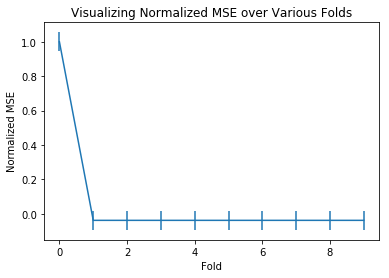

In [27]:
# TODO
plt.errorbar(x = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), y = mse_ts[1, ], yerr = mse_se)
plt.title("Visualizing Normalized MSE over Various Folds")
plt.xlabel("Fold")
plt.ylabel("Normalized MSE")

Print the optimal alpha under the *normal rule*.  That is, the alpha that minimizes the mean test MSE.  Also, print the corresponding minimum MSE.

In [28]:
# TODO
alpha_test

array([  1.00023029e+000,   1.26214453e+010,   1.59264206e+020,
         2.00968168e+030,   2.53592476e+040,   3.19996667e+050,
         4.03789057e+060,   5.09522816e+070,   6.42943377e+080,
         8.11300639e+090,   1.02374291e+101,   1.29181404e+111,
         1.63008065e+121,   2.05692370e+131,   2.59553729e+141,
         3.27518898e+151,   4.13281014e+161,   5.21500279e+171,
         6.58057187e+181,   8.30372059e+191,   1.04780826e+202,
         1.32218099e+212,   1.66839930e+222,   2.10527625e+232,
         2.65655115e+242,   3.35217955e+252,   4.22996100e+262,
         5.33759299e+272,   6.73526279e+282,   8.49891795e+292,
         1.07243932e+303,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               

Now print the optimal alpha and MSE under the *one SE rule*.

In [ ]:
# TODO

Finally, re-fit the model on the entire dataset using the `alpha` from the one SE rule.  Print the coefficients along with the feature names.  Your print out should be something like:

     AtBat 0.000000
      Hits 0.151910
     HmRun 0.000000
      Runs 0.000000
       RBI 0.000000
    ...
     
This way you can see which features are important.

In [ ]:
# TODO

## Lasso path

Finally, we will plot the LASSO path to visualize how the coefficients vary with `alpha`.  Read about the `lasso_path` method in sklearn and compute and plot the LASSO path.

....................................................................................................

(-0.050000000000000003, 1.05, -0.78222244106266481, 1.0968244995106031)

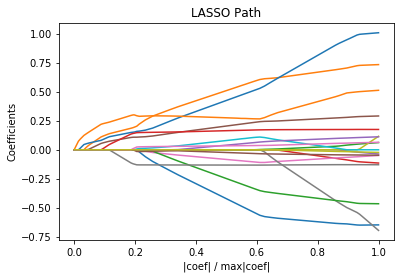

In [29]:
# TODO
alphas1, coeffs, _ = linear_model.lasso_path(Xs, ys, method = "lasso", verbose = True)
xx = np.sum(np.abs(coeffs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coeffs.T)
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()


What are the first eight coefficients that become non-zero in the LASSO path?  

One way to do this is as follows:  Recall that `coeffs[i,j]` is the coeffiecient for feature `i` for alpha value `j`.  Compute `nnz[i] = ` the number of alpha values `j` for which the coefficients `coeffs[i,j]` are non-zero.   Then, sort the features by `nnz[i]` in descending order will give the feature indices in order that they appear in the LASSO path.  Print the features names in order.

In [31]:
# TODO
nnz = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(features)):
    for j in range(len(alpha_test)):
        if coeffs[i, j] != 0:
            nnz[i] = nnz[i] + 1 
print(nnz)
features[8]

[51, 95, 32, 28, 16, 93, 50, 30, 9, 42, 97, 99, 49, 86, 46, 58, 61, 82, 28]


'CHits'

In [32]:
features[4]

'RBI'

In [33]:
features[3]

'Runs'

In [34]:
features[18]

'NewLeague_N'

In [35]:
features[7]

'CAtBat'

In [36]:
features[2]

'HmRun'

In [37]:
features[9]

'CHmRun'

In [38]:
features[14]

'Assists'